In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statsmodels.api as sm # 绘制QQ和PP图
from my_style import set_journal_style

# plt.rcParams.update({
#     'font.family': 'Times New Roman, SimSun',
#     'axes.unicode_minus':False,    # 负号显示
#     # 'font.size': 12,                # 全局字体大小
#     # 'axes.titlesize': 16,           # 标题字体大小
#     # 'axes.labelsize': 14,           # 坐标轴标签大小
#     # 'xtick.labelsize': 12,          # X轴刻度标签
#     # 'ytick.labelsize': 12,          # Y轴刻度标签
#     'axes.spines.top': False,       # 隐藏顶部边框
#     'axes.spines.right': False,     # 隐藏右侧边框
#     'grid.color': '0.8',            # 网格线颜色
#     'figure.figsize': (9, 5),     # 默认图表尺寸
#     'savefig.dpi': 300,             # 保存图片分辨率
#     'mathtext.fontset': 'stix'      # LaTeX数学字体
# })

# # 中文字体设置（Windows）
# plt.rcParams['font.sans-serif'] = ['SimHei']
# plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题
set_journal_style()


In [4]:
# 默认样式
# plt.style.use('ggplot')  # 使用经典学术风格
# plt.style.use('seaborn-v0_8-white')  # 现代统计风格
# plt.style.use('dark_background')  # 深色背景
# plt.style.use(['seaborn-v0_8-white', 'seaborn-v0_8-poster'])  # 组合样式
# 学术论文风格
plt.style.use(['seaborn-v0_8', 
              'seaborn-v0_8-poster', 
              'seaborn-v0_8-colorblind'])  # 颜色友好型

# # 演示报告风格
# plt.style.use(['dark_background', 
#               'seaborn-v0_8-talk'])  # 大字体+高对比度
print(plt.style.available)  
# 中文字体设置（Windows）
plt.rcParams['font.family']=' Times New Roman, SimSun'# 设置字体族，中文为SimSun，英文为Times New Roman
plt.rcParams['axes.unicode_minus'] = False  # 解决负号显示问题

# 内置颜色映射
# cmap = plt.get_cmap('viridis')  # 推荐：viridis, plasma, cividis
# # cmap = plt.get_cmap('plasma')
# # cmap = plt.get_cmap('cividis')
# colors = cmap(np.linspace(0, 1, 1))[0]  # 生成5个渐变色

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


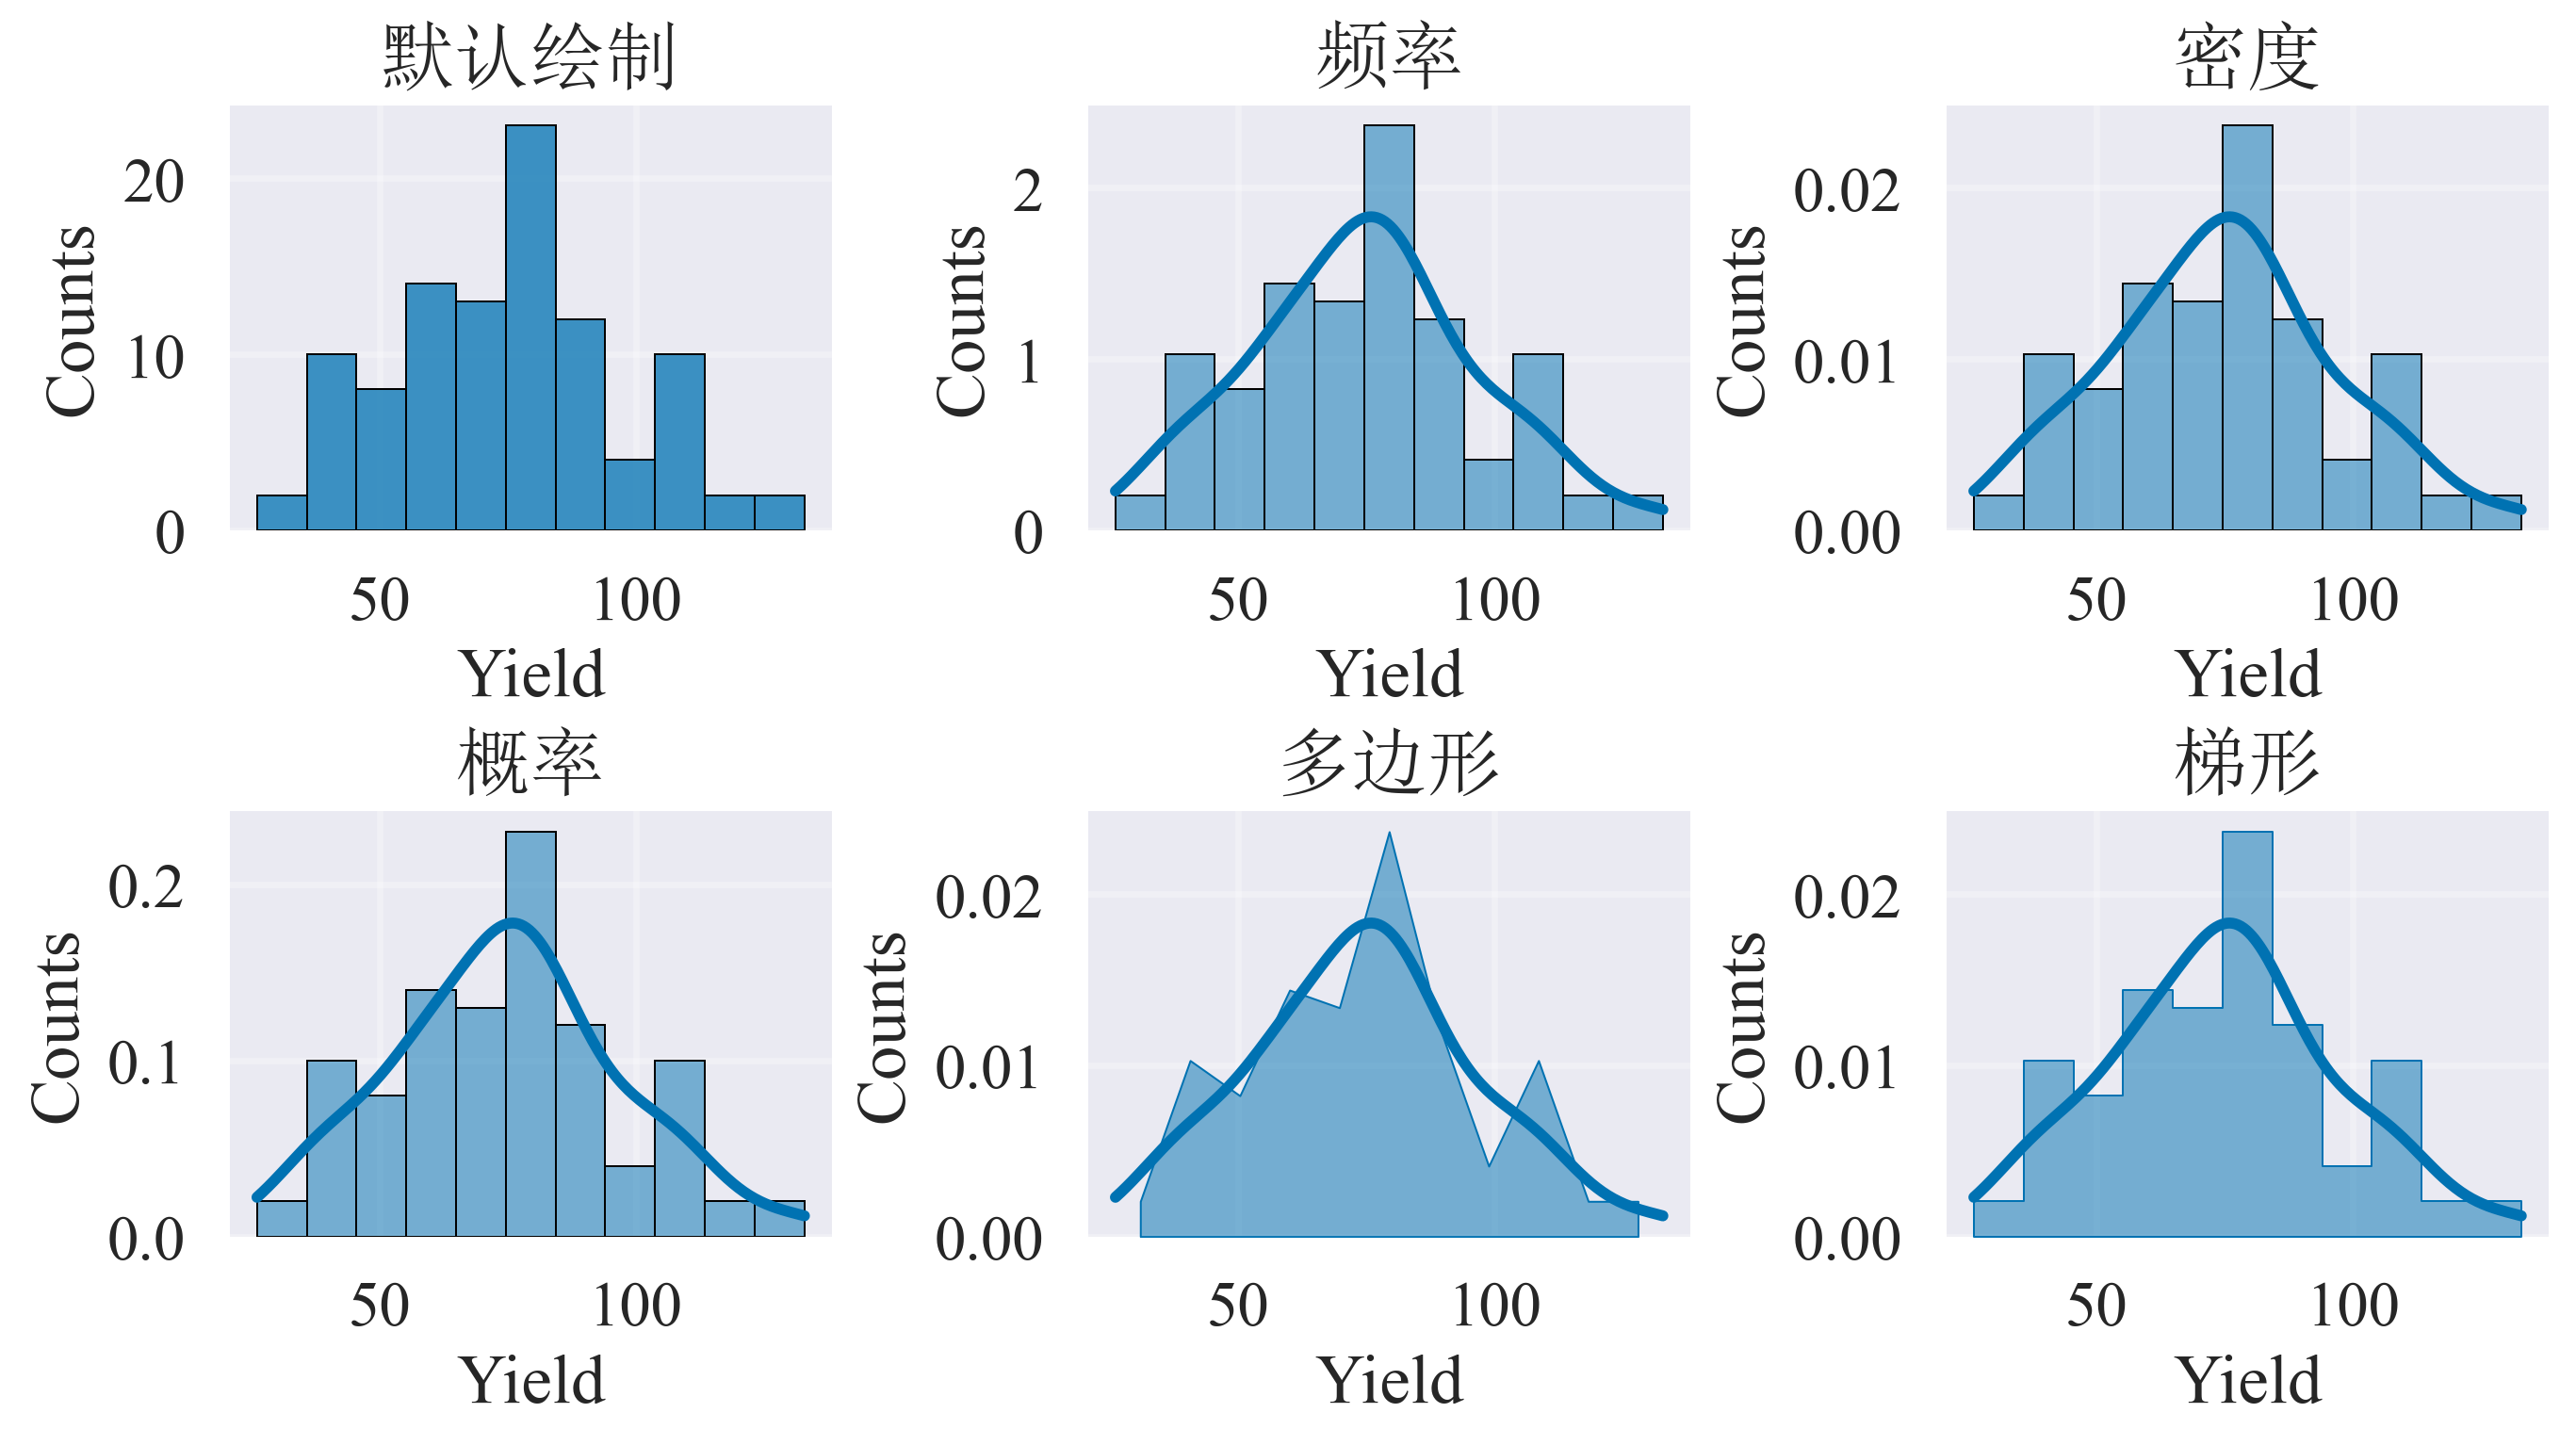

In [5]:
fruit = pd.read_csv('fruit.csv')
# 画布创建
fig, axes = plt.subplots(2,3,
                         figsize=(9,5),
                         layout='constrained') # 增加子图间间距
def plt_hist(x,y,text,key1,key2):
    ax1 = axes[x,y]
    sns.histplot(fruit['yield'],
                 kde=True,
                 stat=f'{key1}',
                 element=f'{key2}',
                 ax=ax1)
    ax1.set(
        title=f'{text}',
        xlabel='Yield', 
        ylabel='Counts',
    )
sns.histplot(fruit['yield'],
             element='bars',
             ax=axes[0,0])
axes[0,0].set(
    title='默认绘制',
    xlabel='Yield', 
    ylabel='Counts',
)
plt_hist(0,1,'频率','frequency','bars')
plt_hist(0,2,'密度','density','bars')
plt_hist(1,0,'概率','probability','bars')
plt_hist(1,1,'多边形','density','poly')
plt_hist(1,2,'梯形','density','step')
# 布局控制
plt.show()

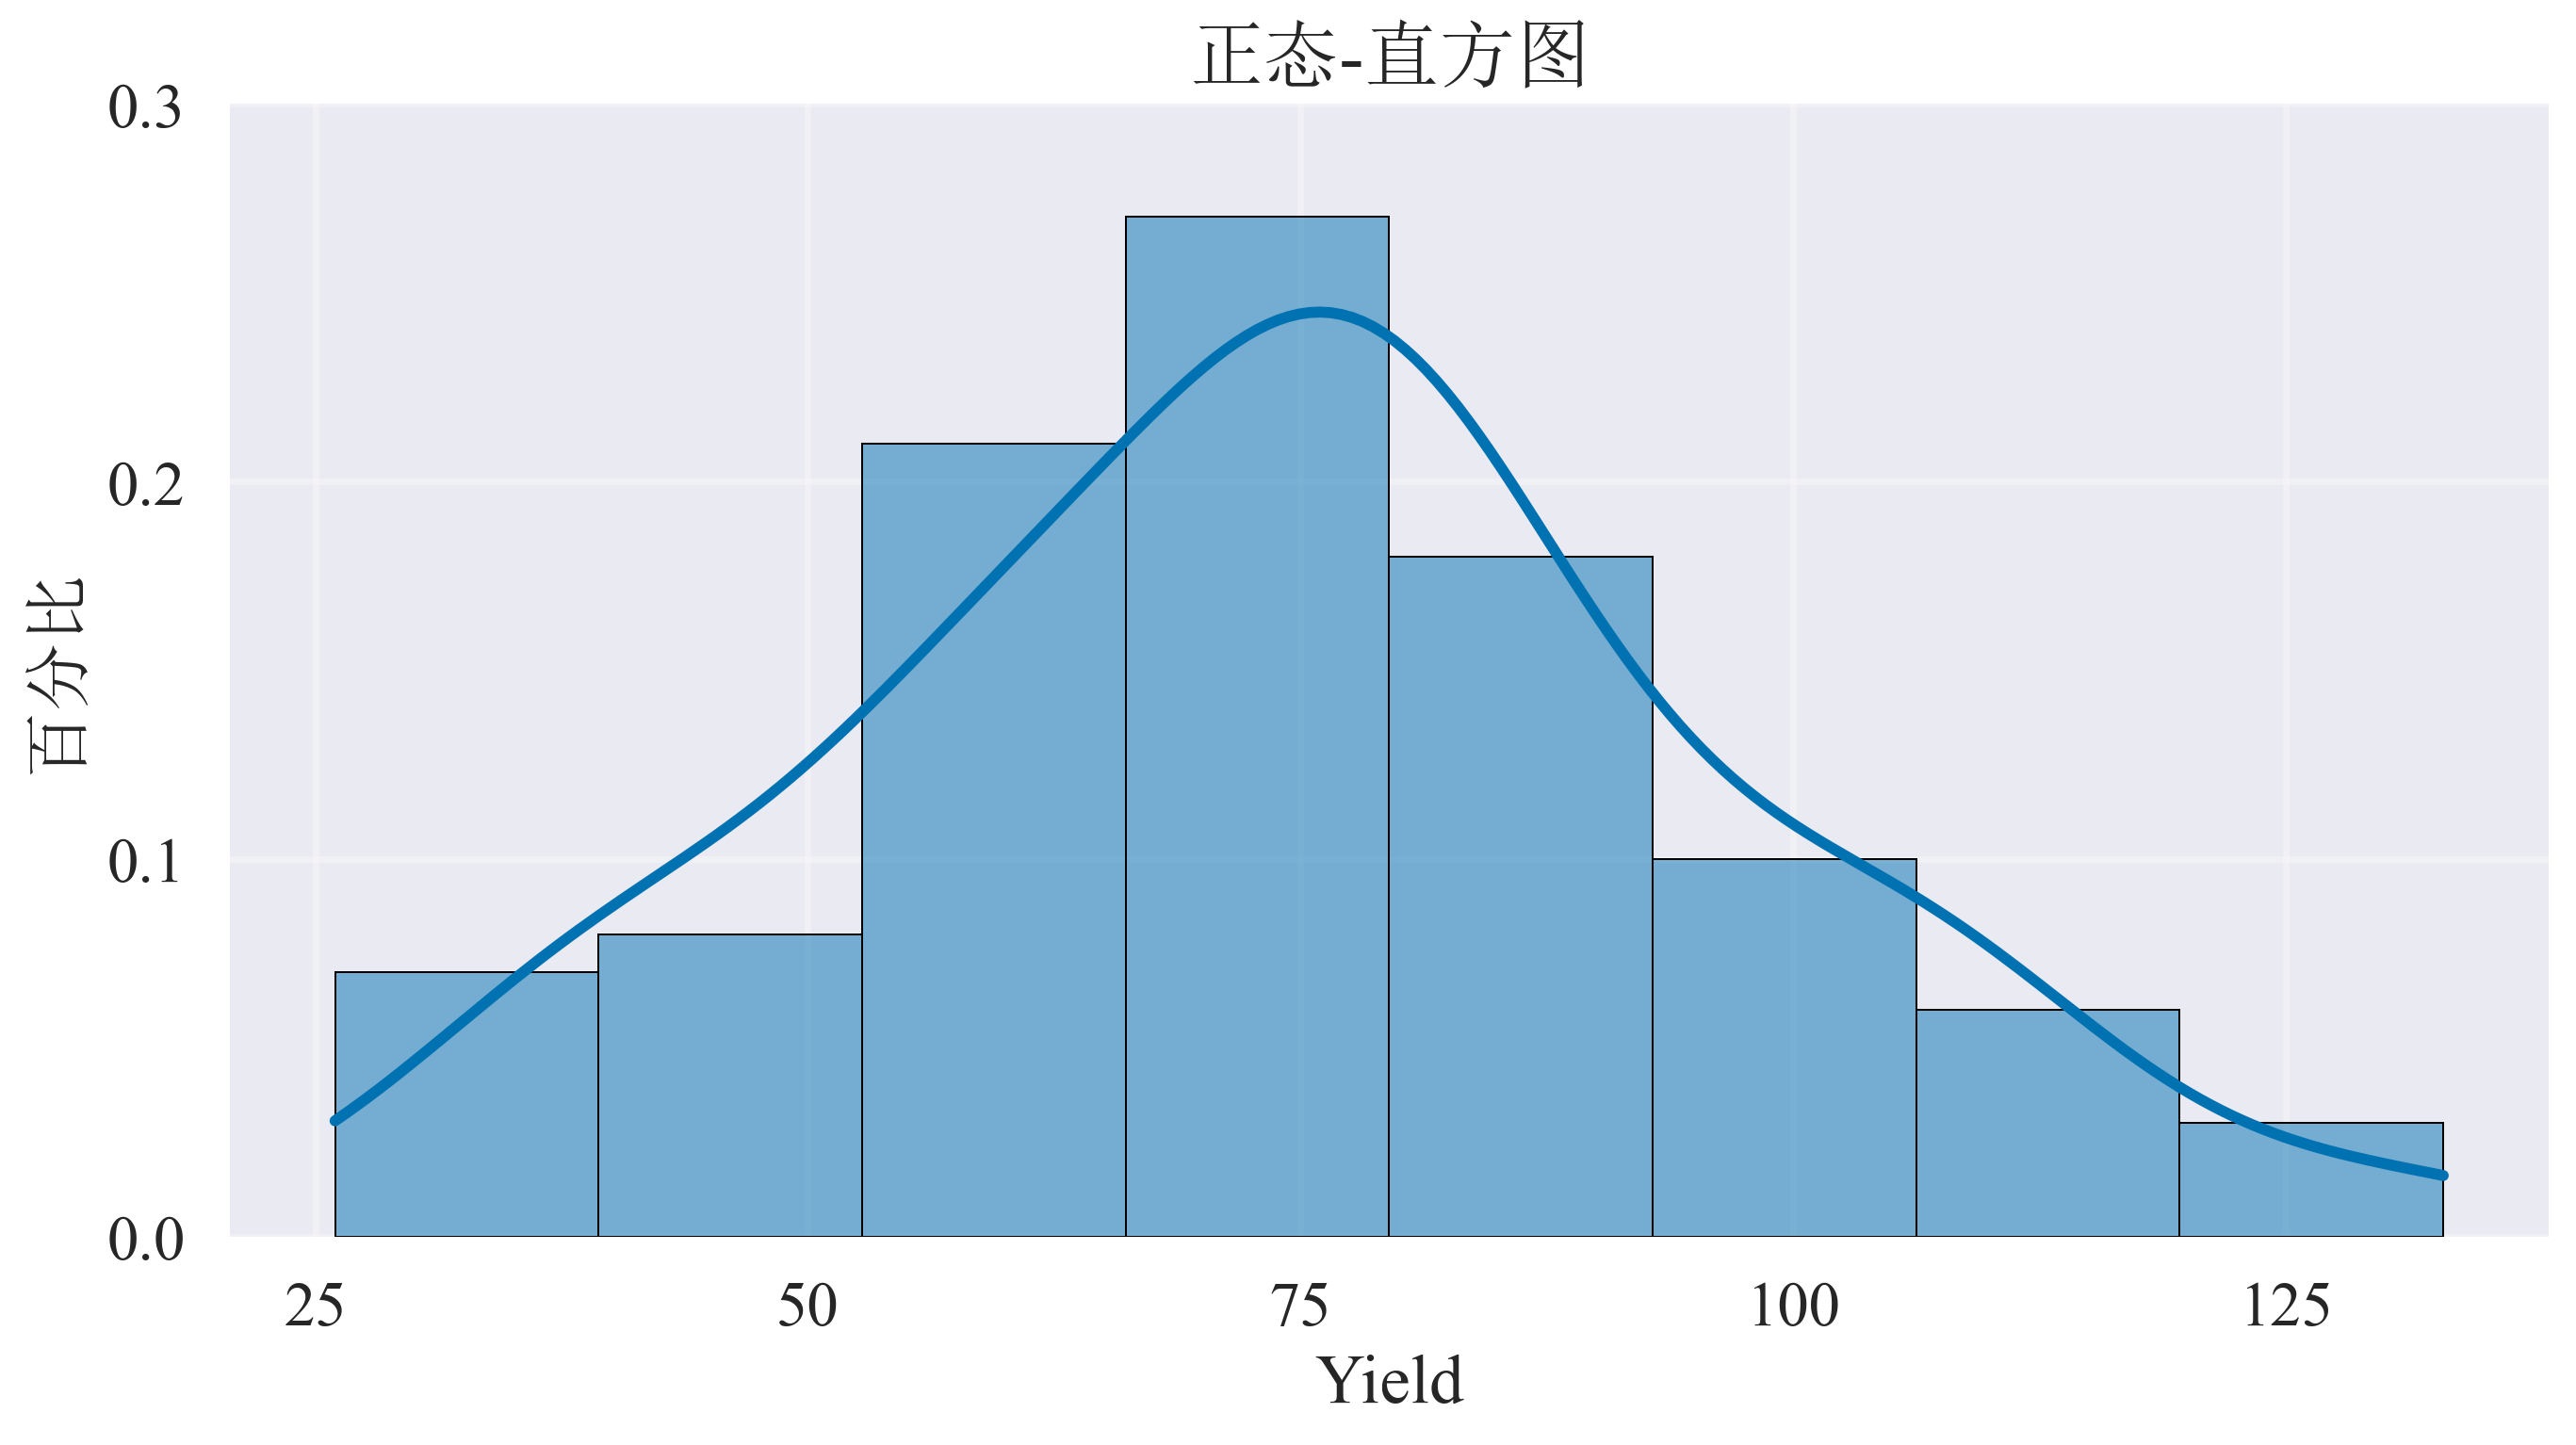

In [6]:
# TODO:正态-直方图
# 画布创建
fig, axes = plt.subplots(figsize=(9,5),layout='constrained')
def plt_hist(text1,text2,key1,key2,num):
    sns.histplot(fruit['yield'],
                 kde=True,
                 bins=num,
                 stat=f'{key1}',
                 element=f'{key2}',
                #  color=colors,
                 ax=axes)
    axes.set(
        title=f'{text1}',
        xlabel='Yield', 
        ylabel=f'{text2}',
        xticks=np.arange(25, 140, 25),
        yticks=np.arange(0, 0.35, 0.1)
    )

plt_hist('正态-直方图','百分比','probability','bars',8)

plt.show()

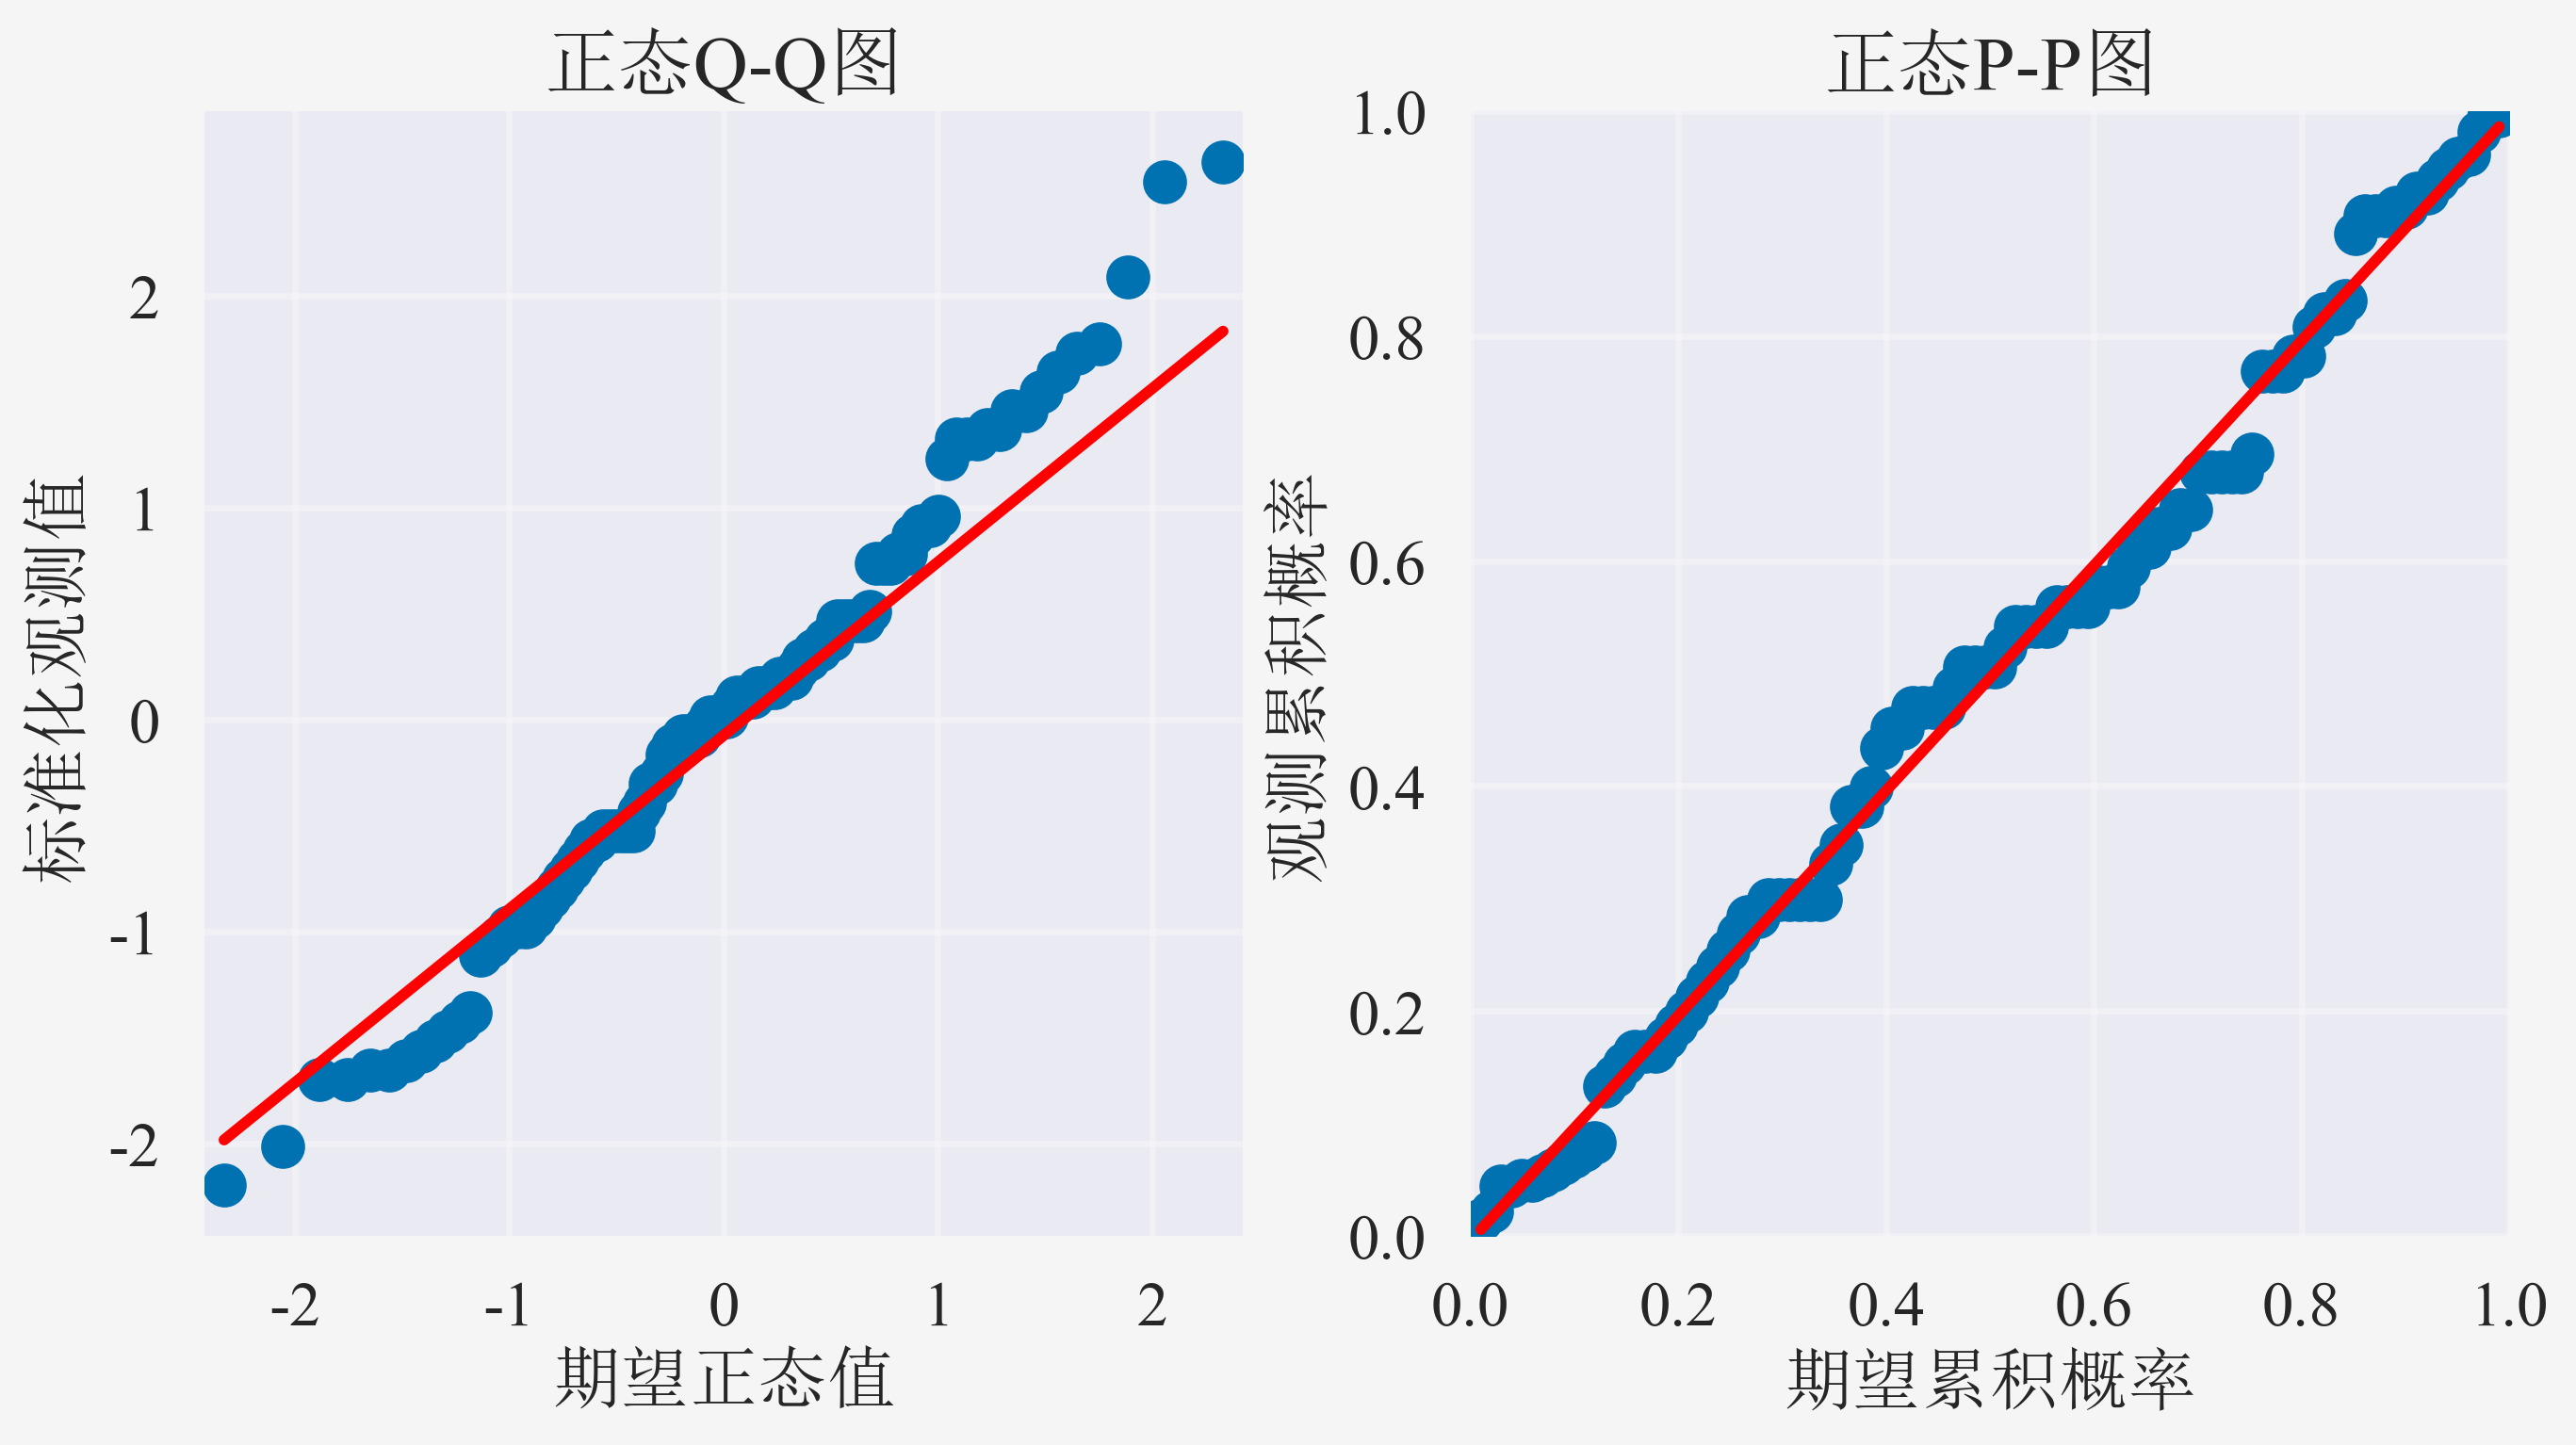

In [7]:
# TODO:Q-Q图--P-P图
# ===创建画布===
fig, axes = plt.subplots(1,2, # 几维坐标系
                         figsize=(9,5), # 画布大小
                         layout='constrained', # plt.tight_layout()
                         facecolor='#f5f5f5' # 画布背景颜色
                         )
pplot = sm.ProbPlot(fruit['yield'],fit=True)

# QQ图
pplot.qqplot(line='q',
             ax=axes[0])
axes[0].set(title='正态Q-Q图',
            xlabel='期望正态值',
            ylabel='标准化观测值')
# PP图
pplot.ppplot(line='r',ax=axes[1])
axes[1].set(title='正态P-P图',
            xlabel='期望累积概率',
            ylabel='观测累积概率')

plt.show()

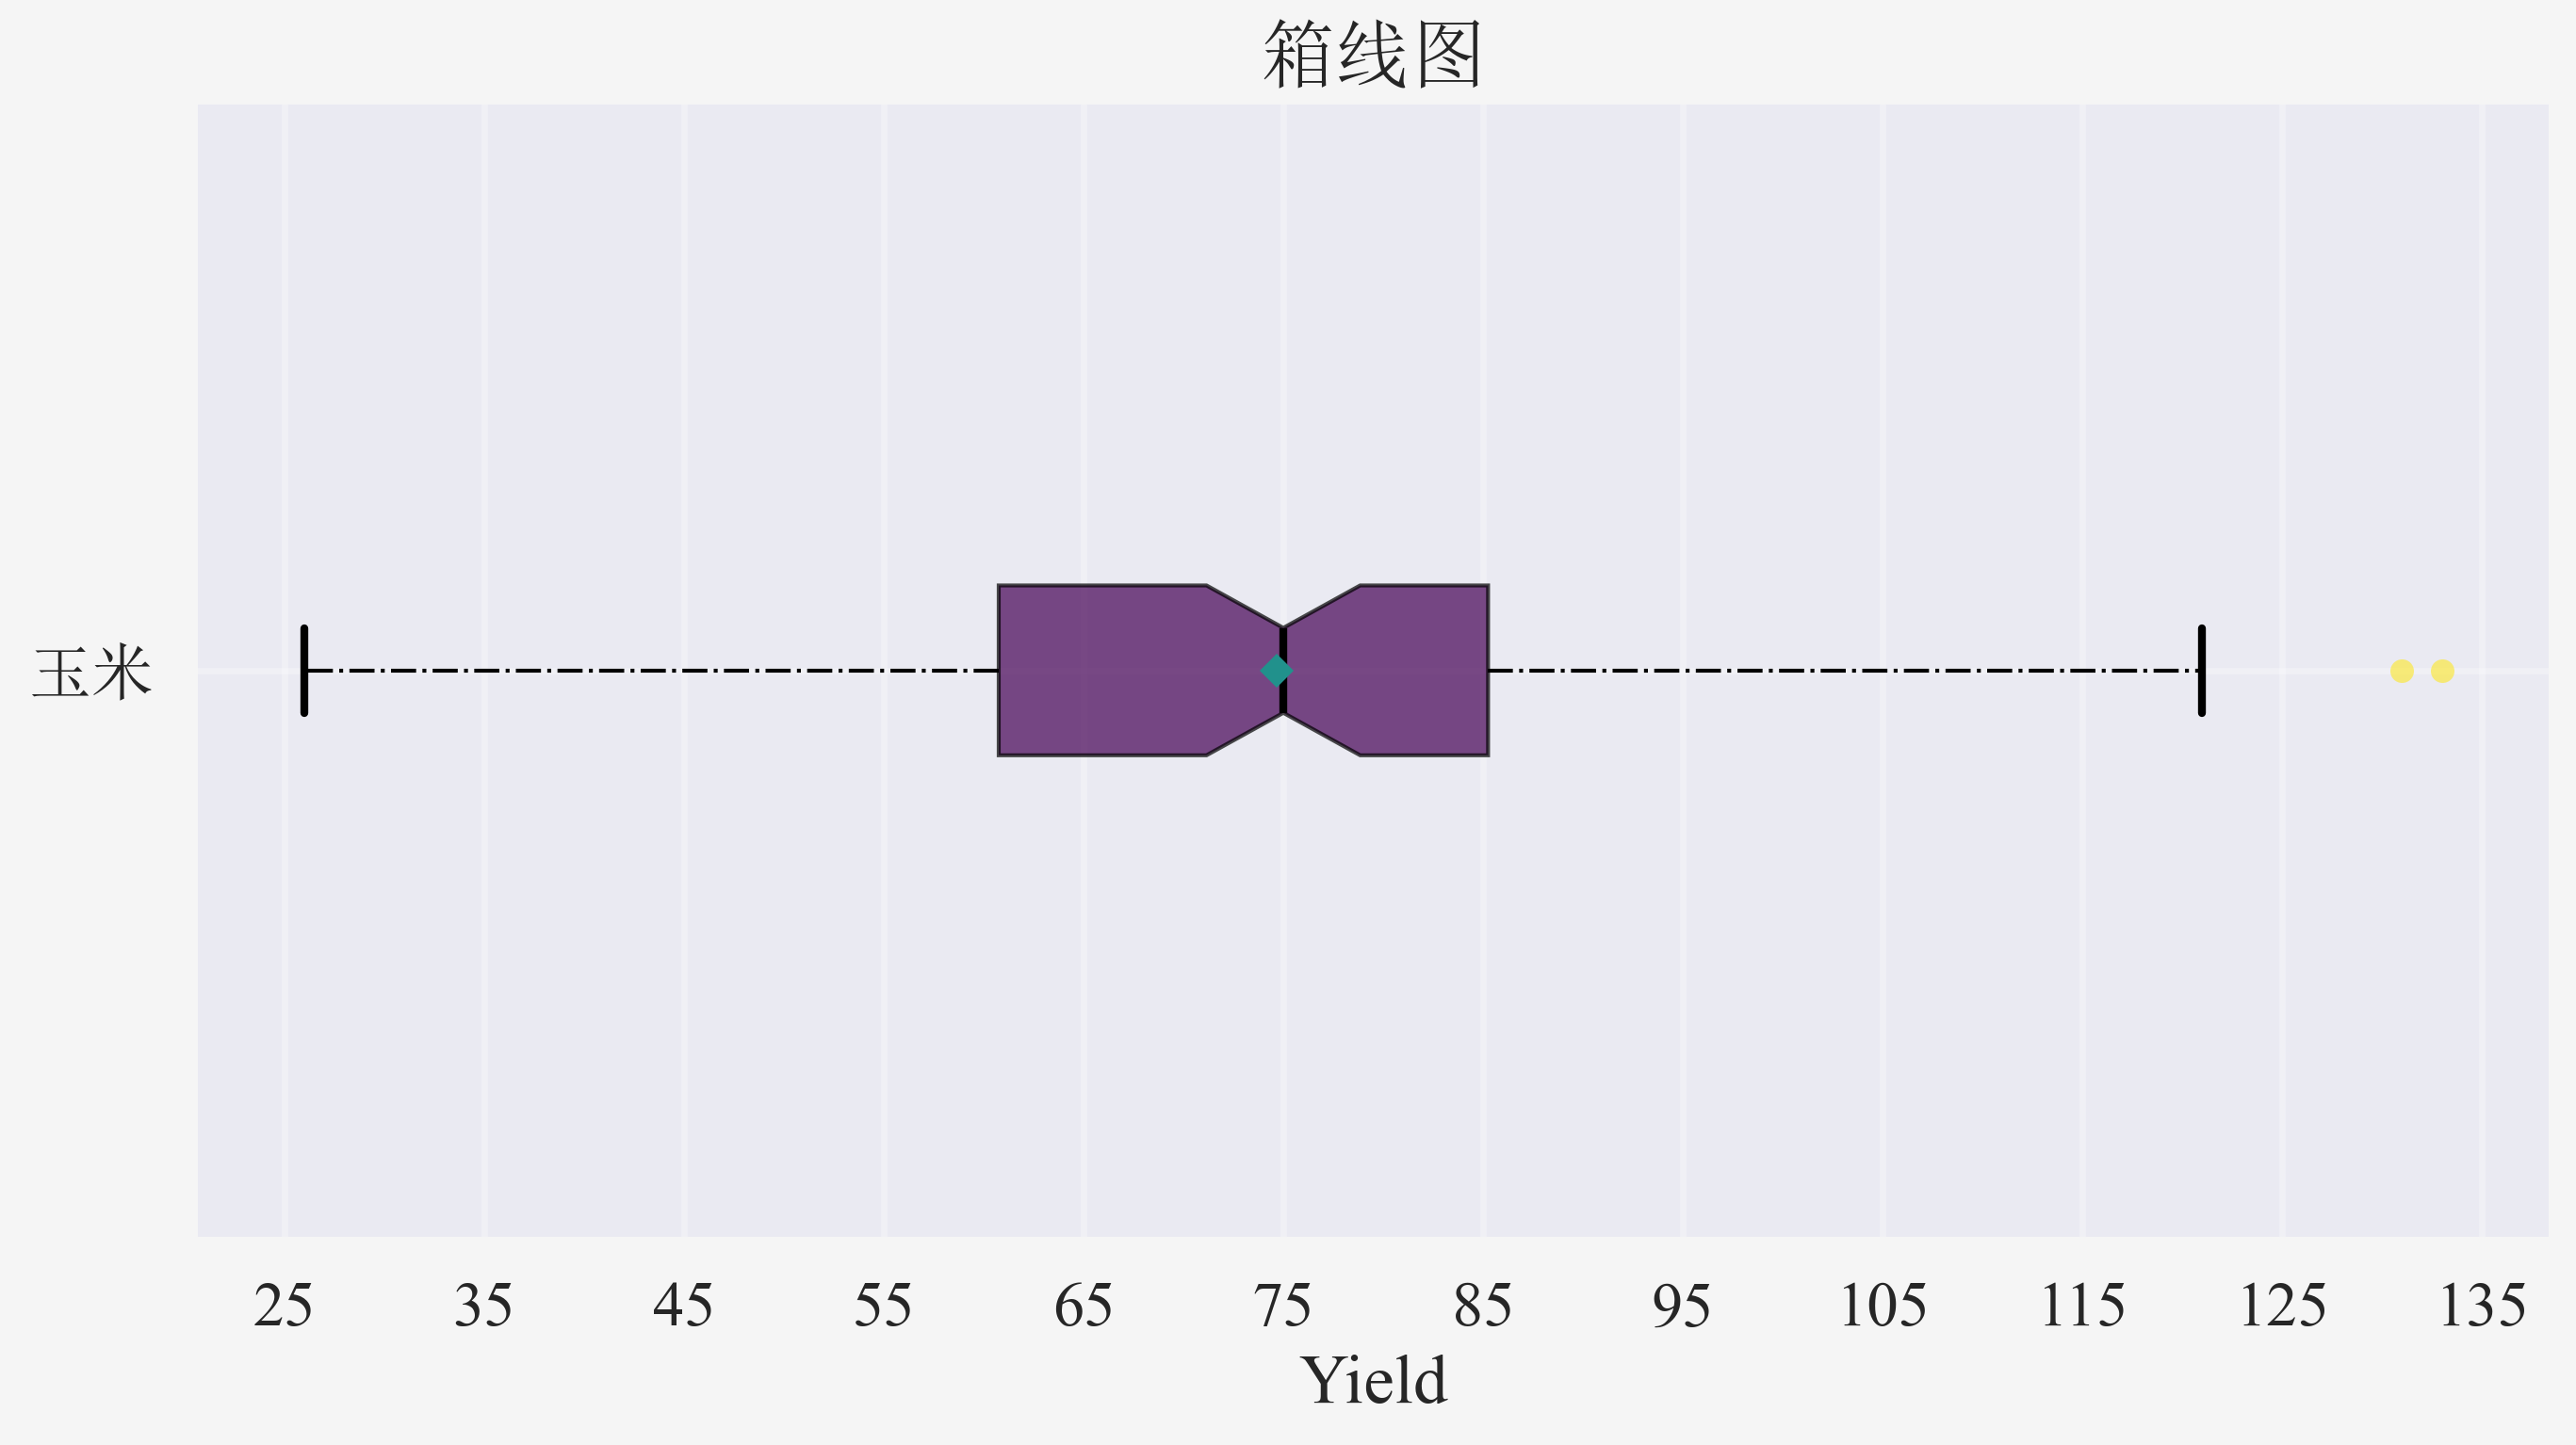

In [8]:
# TODO:箱线图
cmap = plt.get_cmap('viridis')  # 推荐：viridis, plasma, cividis
# cmap = plt.get_cmap('plasma')
# cmap = plt.get_cmap('cividis')
colors = cmap(np.linspace(0, 1, 3))  # 生成5个渐变色
# ===创建画布===
fig, axes = plt.subplots(figsize=(9,5), # 画布大小
                         layout='constrained', # plt.tight_layout()
                         facecolor='#f5f5f5' # 画布背景颜色
                         )
# ===核心绘图===
# sns.boxplot(data=fruit['yield'],
#             orient='h')
labels  = ['玉米']
boxplot = axes.boxplot(x=fruit['yield'],
                       notch=True, # 显示缺口
                       vert=False,
                       patch_artist=True,  # 使用 Patch 对象
                       tick_labels=labels, # 组标签
                       boxprops=dict(facecolor=colors[0], # 箱子填充
                                     edgecolor='black',
                                     alpha=0.7),
                       whiskerprops=dict(color='black',
                                         linewidth=1,
                                         linestyle='-.'),  # 须线颜色
                       capprops=dict(color='black',
                                     linewidth=2),  # 端点线颜色
                       medianprops=dict(color='black',
                                        linewidth=2),  # 中位线颜色
                       showmeans=True,                  # 显示均值点
                       meanprops={'marker': 'D',        # 均值点样式
                                  'markerfacecolor': colors[1],
                                  'markeredgecolor': 'black'},
                       flierprops=dict(marker='o',            # 圆形标记
                                       markersize=6,
                                       markerfacecolor=colors[2],
                                       markeredgecolor='none',
                                       alpha=0.6)
                       )
# 小提琴图
# violinplot = axes.violinplot(dataset=fruit['yield'],
#                              vert=False,
#                              widths=0.3,
#                              quantiles=[[0.1, 0.9]])

# ===坐标系配置===
axes.set(title='箱线图',
         xlabel='Yield',
         xticks=np.arange(25, 140, 10)
         )
axes.spines['top'].set_visible(False) #去掉上边框
axes.spines['right'].set_visible(False) #去掉右边框